# Feature selection lab - Noisy Iris
Lab developed by Gary Marigliano - 07.2018

## Introduction

In this notebook, the [famous iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset has been modified to insert noisy features. The goal is to retrieve the 4 original features (sepal length/width and petal length/width) using features selection techniques.

You can use some features selection algorithms listed here (the python library should already been installed for this project): http://featureselection.asu.edu/html/skfeature.function.html and http://featureselection.asu.edu/tutorial.php

## TODO in this notebook

Answer the questions in this notebook (where **TODO student** is written)

## Setup the Iris dataset

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Below the dataset is modified to create new noisy features to the iris dataset.

In [37]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

## Add some noisy features in the iris dataset

# Add a feature that is always equals to a constant independently of the output --> useless feature
constant_features = np.array([[12 for _ in range(X.shape[0])]]).transpose()
X = np.append(X, constant_features, axis=1)

# Add random noisy features. 
# These features are created using the first feature values with a more or less important noise level
noise_levels = np.arange(1, 6, 0.3)
first_feat = X[:, 1]

n_samples = X.shape[0]
for k in noise_levels:
    noise = k*(np.random.rand() * 2 - 1)
    noisy_features = [noise + first_feat[x] for x in range(n_samples)]
    noisy_features = np.array([noisy_features]).transpose()
    X = np.append(X, noisy_features, axis=1)

# Here we can see that the 5th column is always equals to 12. The colunms after it are the noisy features.
print(X[:3, :])

[[  5.1          3.5          1.4          0.2         12.           3.89112835
    3.12848727   5.07336629   3.87399945   5.18620163   5.72402369
    3.20602402   6.00698295   1.79159803   4.70437903   6.39664069
    2.50055248   5.01206042   7.69612094   6.75050704   3.73615969
   -2.10242483]
 [  4.9          3.           1.4          0.2         12.           3.39112835
    2.62848727   4.57336629   3.37399945   4.68620163   5.22402369
    2.70602402   5.50698295   1.29159803   4.20437903   5.89664069
    2.00055248   4.51206042   7.19612094   6.25050704   3.23615969
   -2.60242483]
 [  4.7          3.2          1.3          0.2         12.           3.59112835
    2.82848727   4.77336629   3.57399945   4.88620163   5.42402369
    2.90602402   5.70698295   1.49159803   4.40437903   6.09664069
    2.20055248   4.71206042   7.39612094   6.45050704   3.43615969
   -2.40242483]]


Next, we start selecting relevant features. To do that, we prepare the data to be "machine learning ready".

This means that we need to split the data into a train set and a test set.


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

For this first notebook, the example below shows how to train and get the features sorted by decreasing importance.

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

# train
clf = ExtraTreesClassifier(n_jobs=2, n_estimators=10)
clf.fit(X_train, y_train)

# get the score
score = clf.score(X_test, y_test)
print("score {:.3f}".format(score))

# rank the features
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

n_features = X_train.shape[1]

# get the features sorted by decreasing importance
feat_importances_sorted = [(indices[f], importances[indices[f]]) for f in range(n_features)]

score 0.900


**TODO student**: 
* Plot the features importances with a bar chart (see picture below)
* Comment the plot you just made. Here are some clues about the questions you should ask yourself:
   * What this plot represents ?
   * How do you compare two features using this graph ?
   * How would you choose a "good" number of good features ?
   * How can you be sure that the features you select are relevant ? What kind of tasks should you do ?
   * How could you prove it ?
   * For this modified dataset, is it really useful to reduce the number of features ?
   * How easy/hard it is to retrieve the original features ?

<img src="assets/01-noisy-iris-feat-importances-example.png" />

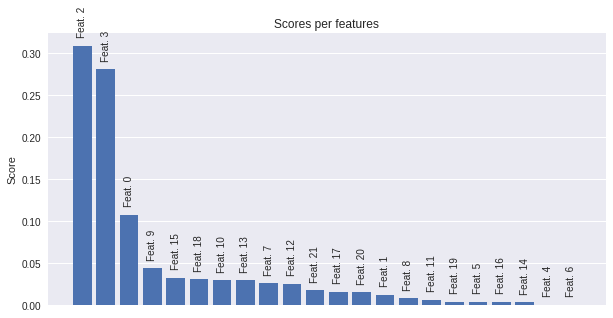

In [40]:
fig, ax = plt.subplots(figsize=(10,5))

sorted_x = np.argsort(-importances)
sorted_y = sorted(importances, reverse=True)
labels = list(map(lambda x : 'Feat. {}'.format(x), sorted_x))

ax.set_xlabel('Features')
ax.set_ylabel('Score')
ax.set_title('Scores per features')
ax.get_xaxis().set_visible(False)
# We hide the X axis since we provided dummy values to prevent automatic sorting
rects = ax.patches

ax.bar(np.arange(0, len(importances)), sorted_y, 0.8)
ax.set_xticklabels(sorted_x)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom', rotation = 90)


## Comments
This plot represents the "importance" of each feature, meaning how much each feature contributed to the classification of each sample. For example, our uniform feature that is always equal to 12 (Feature 4) has an importance of 0.0, since it does not contribute in any way to the classification. Feature 2, on the other hand, was the most important in classifying data.
 
In our case, we have 3 clear "good" features, that have a high impact on the classification. The remaining features still have an impact, however for the features we added with a random number generator this means that the features are not contributing to the classification, they are merely adapting to random noise. By reducing the number of features, we can eliminate these "bad" features and keep only a few.

For this small dataset, reducing the number of features is not essential since the calculation time is too small to be impactful. Even if a feature only contributes a fraction of a percent to the classification, there is a net gain since calculation time is not noticeable. It only applies if the feature is contributing to the classification and is not based on random noise. On larger datasets, however, excessive features will slow down the process and feature selection is practically mandatory. 

To verify that features are relevant, we should train a new model using only the selected features, which we will do at the end of this notebook. Ideally, multiple classifiers should be used and then compared to the results of using all features available/random features. It will be done in parts 2 and 3 of this lab.

In this example, retrieving the original features is easy except for the one that was multiplied with random noise: since every random noise feature is based off one original feature, it ends up not having a high importance since by chance other features could seem to contain similar information, especially if only a small amount of noise is added. If the "noisy" features were truly random and not based on an original feature, this would not occur.

## Assessing the relevance of the features' score

Now that we have the features sorted by decreasing importances, your task is to choose which ones to keep.

**TODO student**:

* Choose N features that you find relevant
* Justify the N number you chose
* Compare, using a confusion matrix or an other relevant score metric, the classifier performance between:
    * your selected features and the noisy iris dataset 
    * your selected features and some N random features (take the average score of K runs for the random features)
    * your selected features and the worse N features (look at your feature importance plot)
* Comment the obtained results. Here are some clues about the questions you should ask yourself:
    * Among the features you select how many are the original features ?
    * Is the useless feature (the one that always contains the same value) selected ?
    
To plot a prettier confusion matrix you can use this class:

``` python
from ConfusionMatrix import ConfusionMatrix
y_pred = clf.predict(X_test_random)
cm = confusion_matrix(y_test, y_pred)
n_classes = len(np.unique(y))
ConfusionMatrix.plot(cm, classes=range(n_classes), title="Confusion Matrix")
```

In [41]:
#Keep only features 0, 2 and 3
X2 = X[:, [0,2,3]]
print(X2.shape)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y, test_size=0.33)

# train
clf2 = ExtraTreesClassifier(n_jobs=2, n_estimators=10)
clf2.fit(X_train_2, y_train_2)

# get the score
score = clf2.score(X_test_2, y_test_2)
print("score {:.3f}".format(score))

# Keep only worst 4 features
X3 = X[:, sorted_x[-3:]]
print(X2.shape)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y, test_size=0.33)

# train
clf3 = ExtraTreesClassifier(n_jobs=2, n_estimators=10)
clf3.fit(X_train_3, y_train_3)

# get the score
score = clf3.score(X_test_3, y_test_3)
print("score {:.3f}".format(score))



(150, 3)
score 0.900
(150, 3)
score 0.400


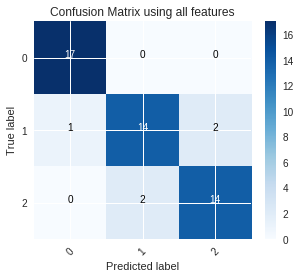

In [42]:
#Compare matrices
from ConfusionMatrix import ConfusionMatrix
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test_2)
y_pred3 = clf3.predict(X_test_3)
cm = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test_2, y_pred2)
cm3 = confusion_matrix(y_test_3, y_pred3)
n_classes = len(np.unique(y))
ConfusionMatrix.plot(cm, classes=range(n_classes), title="Confusion Matrix using all features")

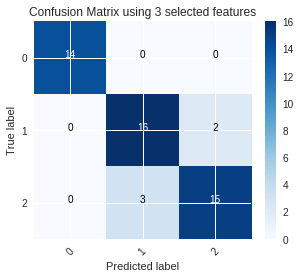

In [43]:
ConfusionMatrix.plot(cm2, classes=range(n_classes), title="Confusion Matrix using 3 selected features")

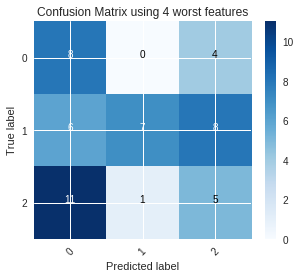

In [44]:
ConfusionMatrix.plot(cm3, classes=range(n_classes), title="Confusion Matrix using 4 worst features")

## Assessing score

In the previous section, we saw that the importance of 3 features was the highest. They were the features 0, 2 and 3. These are all features taken directly from the iris dataset and not the ones with random noise added. 

These selected features clearly have the highest accuracy and the least amount of classification errors. We did not use one of the original dataset features (before noise) since it did not appear with high importance during our feature selection stage.

Using the worst features gives an obviously bad result, with an overall accuracy of 0.4. 

The useless feature was obviously not selected for our "selected features" since it brings no information to the classifier and therefore increases complexity with absolutely no accuracy gain. However, it was selected when choosing the worst features, since it has an importance of 0 for the reason explained above.

### Going further (optional)

Now that you finished this notebook, it can be interesting to go a step further and try the points below:

* Can we have better results (i.e. more relevant features and/or less features) if the input data are normalized ?
* Can we retrieve the same relevant features with another features selection technique ?
* Are the selected features only relevant for this specific classifier or do they generalize well with other classifiers ?
* Plot the classifier performance for the K best features where K is $1, 2,..,k_{-1},k$ and comment the results
* Anything you find relevant...

Please answer to these questions just below in this same notebook.